# Hierarchical Clustering


# References

**Источники:**

[What is Hierarchical Clustering?](https://www.displayr.com/what-is-hierarchical-clustering/)

[Hierarchical clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering)

[Иерархическая кластеризация](https://ru.wikipedia.org/wiki/%D0%98%D0%B5%D1%80%D0%B0%D1%80%D1%85%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F)

[Understanding the concept of Hierarchical clustering Technique](https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec)

[Hierarchical clustering explained](https://towardsdatascience.com/hierarchical-clustering-explained-e59b13846da8)

[A Beginner’s Guide to Hierarchical Clustering and how to Perform it in Python](https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/)

[Clustering with Scikit with GIFs](https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/)

[Agglomerative clustering with different metrics](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_clustering_metrics.html#sphx-glr-auto-examples-cluster-plot-agglomerative-clustering-metrics-py)

[Various Agglomerative Clustering on a 2D embedding of digits](https://scikit-learn.org/stable/auto_examples/cluster/plot_digits_linkage.html#sphx-glr-auto-examples-cluster-plot-digits-linkage-py)

[Hierarchical clustering](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering)

[SciPy Hierarchical Clustering and Dendrogram Tutorial](https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/)

# References

## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [2]:
# !conda install matplotlib numpy scikit-learn seaborn scipy -y

In [4]:
# !conda install -c conda-forge umap-learn -y

In [12]:
# ipympl + widget включает интерактивные функции matplotlib

# !conda install ipympl -y
# !conda install -c conda-forge nodejs -y
# !conda install -c conda-forge/label/gcc7 nodejs -y
# !conda install -c conda-forge/label/cf201901 nodejs -y
# !conda install -c conda-forge/label/cf202003 nodejs -y

**ВНИМАНИЕ:**

При установке `labextension` может возникнуть Warning:
```
Config option `kernel_spec_manager_class` not recognized by `InstallLabExtensionApp`.
[W 2021-07-03 10:54:07.747 LabApp] Config option `kernel_spec_manager_class` not recognized by `LabApp`.
```
Это предупреждение не должно повлиять на результат.

После это очень важно перезапустить `jupyter-lab`. Для выключения недостаточно закрыть окно, нужно воспользоваться командой `File -> Shut Down`. Затем можно привычным способом запусить `jupyter-lab`.

In [13]:
# !jupyter labextension install @jupyter-widgets/jupyterlab-manager
# !jupyter labextension install jupyter-matplotlib
# !jupyter nbextension enable --py widgetsnbextension

In [5]:
import numpy as np

np.__version__

'1.20.2'

In [6]:
import pandas as pd

pd.__version__

'1.2.4'

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

matplotlib.__version__

'3.3.4'

In [8]:
import seaborn as sns

sns.__version__

'0.11.1'

In [9]:
import umap
from umap import UMAP

umap.__version__

'0.5.1'

In [10]:
import sklearn

from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA

from sklearn.preprocessing import QuantileTransformer

sklearn.__version__

'0.24.2'

In [11]:
import scipy

from scipy.cluster.hierarchy import dendrogram, linkage

scipy.__version__

'1.6.2'

## Описание

**Иерархическая кластеризация (также графовые алгоритмы кластеризации и иерархический кластерный анализ)** — совокупность алгоритмов упорядочивания данных, направленных на создание иерархии (дерева) вложенных кластеров.

Выделяют два класса методов иерархической кластеризации:

- **Агломеративные методы (англ. agglomerative)**: новые кластеры создаются путем объединения более мелких кластеров и, таким образом, дерево создается от листьев к стволу.

- *Дивизивные или дивизионные методы (англ. divisive)*: новые кластеры создаются путем деления более крупных кластеров на более мелкие и, таким образом, дерево создается от ствола к листьям.

Алгоритмы иерархической кластеризации предполагают, что анализируемое множество объектов характеризуется определённой степенью связности. 

По количеству признаков иногда выделяют монотетические и политетические методы классификации. 

**Графы, как и большинство визуальных способов представления зависимостей, быстро теряют наглядность при увеличении числа кластеров.**

### Агломеративная кластеризация (Agglomerative clustering)

Важные гиперпараметры:

- `n_clusters` - количество кластеров, которые нужно найти.

- `affinity` - метрика, используемая для вычисления связи (`linkage`).

- `linkage` (критерий связи) определяет метрику, используемую для стратегии слияния.
    - `'ward'` (default) минимизирует сумму квадратов разностей во всех кластерах. Это подход с минимизацией дисперсии (variance), и в этом смысле он аналогичен целевой функции k-средних, но решается с помощью агломеративного иерархического подхода.
    - `'complete'` - максимальное (maximum) или полное связывание (complete linkage) сводит к минимуму максимальное расстояние между наблюдениями пар кластеров.
    - `'average'` минимизирует среднее значение расстояний между всеми наблюдениями пар кластеров.
    - `'single'` минимизирует расстояние между ближайшими наблюдениями пар кластеров.
    
    - Агломеративный кластер ведет себя "жадно", что приводит к неравномерному размеру кластера. В этом отношении `'single'` - худшая стратегия, и `'ward'` дает самые обычные размеры. 
    
    - Однако сродство (или расстояние, используемое при кластеризации) нельзя изменять с помощью `'ward'`, поэтому для **не евклидовых** расстояний хорошей альтернативой является **`'average'`**.
    
    - `'single'` связь, хотя и **не устойчива к зашумленным данным**, может быть вычислена очень эффективно и поэтому может быть полезна для обеспечения иерархической кластеризации **больших наборов** данных. Одиночная связь также может хорошо работать с не глобулярными данными.
    
    <img src="images/linkage_comparison.png" width=500/>

### Дендрограмма

**Под дендрограммой обычно понимается дерево, построенное по матрице мер близости.**

Дендрограмма позволяет изобразить взаимные связи между объектами из заданного множества.

Для создания дендрограммы требуется матрица сходства (или различия), которая определяет уровень сходства между парами кластеров. Чаще используются агломеративные методы.

<img src="images/agglomerative_clustering.gif" width=800/>

## Загрузка данных

[Источник (custDatasets)](https://www.kaggle.com/gangliu/custdatasets).

In [12]:
df = pd.read_csv("./../../data/Cust_Segmentation.csv", index_col=0)
df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
Customer Id,,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...
846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4


## Анализ данных

См. лекцию [02_pca](../../08_modeling_ml_demensionality_reduction/lectures/02_pca.ipynb)

## Подготовка данных

In [13]:
df["Defaulted"].fillna(0, inplace=True)
df["Defaulted"] = df["Defaulted"].astype(int)
df["Defaulted"].isna().sum()

0

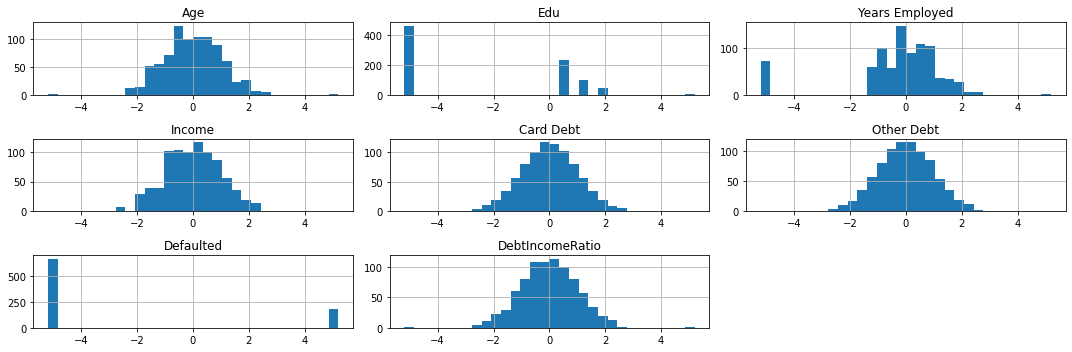

In [14]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
norm_trans = QuantileTransformer(output_distribution="normal", n_quantiles=100)
df_norm = pd.DataFrame(norm_trans.fit_transform(df[num_cols]), columns=num_cols)
df_norm.hist(bins=30, figsize=(15, 5))
plt.tight_layout()

## 3-D PCA

In [15]:
pca_3 = PCA(n_components=3)
df_pca_3 = pd.DataFrame(pca_3.fit_transform(df_norm))

In [16]:
%matplotlib widget
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=-135, elev=35)

ax.scatter(df_pca_3[0], df_pca_3[1], df_pca_3[2], alpha=0.4, s=80)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [17]:
%matplotlib inline

## 3-D UMAP

In [18]:
umap_3 = UMAP(n_components=3)
df_umap_3 = pd.DataFrame(umap_3.fit_transform(df_norm))

In [19]:
%matplotlib widget

from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=25, elev=35)

ax.scatter(df_umap_3[0], df_umap_3[1], df_umap_3[2], alpha=0.3, s=80)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [20]:
%matplotlib inline

## Построение модели

In [21]:
model = AgglomerativeClustering(
    n_clusters=4, compute_distances=True, linkage="single"
).fit(df_norm)
model

AgglomerativeClustering(compute_distances=True, linkage='single', n_clusters=4)

<AxesSubplot:ylabel='count'>

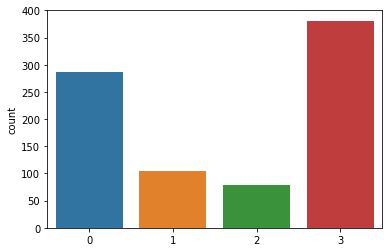

In [22]:
labels = model.labels_
sns.countplot(x=labels)

In [23]:
clusters = np.unique(labels)
clusters

array([0, 1, 2, 3])

In [24]:
df_norm["Cluster"] = model.labels_
df["Cluster"] = model.labels_
df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster
Customer Id,,,,,,,,,,
1,41,2,6,19,0.124,1.073,0,NBA001,6.3,0
2,47,1,26,100,4.582,8.218,0,NBA021,12.8,3
3,33,2,10,57,6.111,5.802,1,NBA013,20.9,1
4,29,2,4,19,0.681,0.516,0,NBA009,6.3,0
5,47,1,31,253,9.308,8.908,0,NBA008,7.2,3
...,...,...,...,...,...,...,...,...,...,...
846,27,1,5,26,0.548,1.220,0,NBA007,6.8,3
847,28,2,7,34,0.359,2.021,0,NBA002,7.0,0
848,25,4,0,18,2.802,3.210,1,NBA001,33.4,1


## Анализ результатов

In [25]:
from matplotlib.colors import ListedColormap, BoundaryNorm

cmap = ListedColormap(["coral", "blue", "lime", "violet"])

### Полная дендограмма

Text(0, 0.5, 'Euclidean distances')

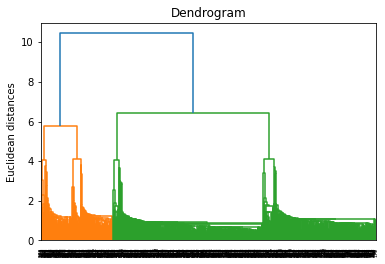

In [26]:
d = dendrogram(linkage(df_norm, method="single"))
plt.xticks(rotation=90)

plt.title("Dendrogram")
plt.ylabel("Euclidean distances")

### Сокращенная дендограмма

In [27]:
def plot_dendrogram(model, **kwargs):
    # количество выборок под каждым узлом
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

Text(0.5, 0, 'Number of points in node (or index of point if no parenthesis).')

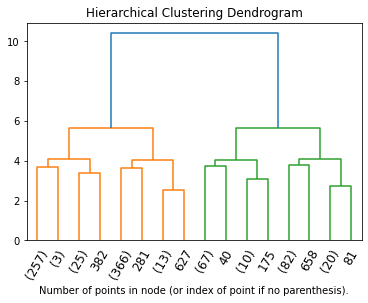

In [28]:
# TODO
plt.title("Hierarchical Clustering Dendrogram")
# график трех верхних уровней дендрограммы
plot_dendrogram(model, truncate_mode="level", p=3)

plt.xticks(rotation=60)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

### Анализ "представителей" кластеров

In [29]:
df_clusters = {}
cluster_examples = pd.DataFrame()

for c in clusters:
    print(f"Cluster = {c}")

    df_c = df[df.Cluster == c]
    df_clusters[c] = df_c

    middle_row_index = int(len(df_c) * 0.75)
    cluster_examples = cluster_examples.append(df_c.iloc[middle_row_index])

    display(df_c)
    display(df_c.describe())

    print("\n", "=" * 50, "\n")

Cluster = 0


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster
Customer Id,,,,,,,,,,
1,41,2,6,19,0.124,1.073,0,NBA001,6.3,0
4,29,2,4,19,0.681,0.516,0,NBA009,6.3,0
7,38,2,4,56,0.442,0.454,0,NBA013,1.6,0
8,42,3,0,64,0.279,3.945,0,NBA009,6.6,0
10,47,3,23,115,0.653,3.947,0,NBA011,4.0,0
...,...,...,...,...,...,...,...,...,...,...
837,23,2,3,24,0.552,0.960,0,NBA004,6.3,0
841,38,3,13,25,0.343,1.082,0,NBA018,5.7,0
842,29,3,7,63,0.572,2.893,0,NBA001,5.5,0


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.0,286.000000,286.0
mean,35.622378,2.534965,8.541958,55.706294,1.472444,3.165122,0.0,8.685315,0.0
std,8.071004,0.761232,6.441368,40.263576,1.704603,3.176850,0.0,5.656841,0.0
min,20.000000,2.000000,0.000000,14.000000,0.015000,0.053000,0.0,0.100000,0.0
25%,29.000000,2.000000,3.000000,28.000000,0.403500,1.021000,0.0,4.400000,0.0
50%,35.000000,2.000000,8.000000,43.000000,0.891500,2.067000,0.0,7.550000,0.0
75%,41.000000,3.000000,12.000000,68.750000,1.839750,4.272250,0.0,12.175000,0.0
max,54.000000,5.000000,31.000000,266.000000,9.877000,18.269000,0.0,32.400000,0.0




Cluster = 1


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster
Customer Id,,,,,,,,,,
3,33,2,10,57,6.111,5.802,1,NBA013,20.9,1
11,44,3,8,88,0.285,5.083,1,NBA010,6.1,1
15,28,3,2,20,0.233,1.647,1,NBA000,9.4,1
23,28,3,6,47,5.574,3.732,1,NBA008,19.8,1
33,23,2,0,42,1.019,0.619,1,NBA001,3.9,1
...,...,...,...,...,...,...,...,...,...,...
797,25,4,0,24,1.597,1.307,1,NBA006,12.1,1
817,36,2,6,27,0.262,0.980,1,NBA015,4.6,1
824,27,4,0,25,1.419,1.756,1,NBA000,12.7,1


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.0,104.000000,104.0
mean,32.663462,2.586538,4.615385,47.663462,2.422279,4.287221,1.0,14.088462,1.0
std,7.836448,0.758263,4.653650,52.537109,2.908140,4.689026,0.0,7.407701,0.0
min,21.000000,2.000000,0.000000,15.000000,0.118000,0.161000,1.0,0.900000,1.0
25%,27.000000,2.000000,1.000000,24.000000,0.480750,1.459000,1.0,8.475000,1.0
50%,31.000000,2.000000,3.000000,33.000000,1.446000,2.711000,1.0,13.450000,1.0
75%,39.000000,3.000000,6.250000,52.750000,3.059000,5.071750,1.0,18.475000,1.0
max,53.000000,5.000000,18.000000,446.000000,16.031000,27.034000,1.0,36.600000,1.0




Cluster = 2


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster
Customer Id,,,,,,,,,,
38,37,1,0,18,1.584,0.738,1,NBA018,12.9,2
41,20,1,4,14,0.201,1.157,1,NBA000,9.7,2
53,24,1,3,19,1.358,3.278,1,NBA004,24.4,2
56,34,1,2,25,0.573,2.577,1,NBA011,12.6,2
57,32,1,1,20,0.315,0.645,1,NBA000,4.8,2
...,...,...,...,...,...,...,...,...,...,...
803,26,1,0,14,0.302,0.748,1,NBA000,7.5,2
810,22,1,4,19,1.887,2.502,1,NBA003,23.1,2
814,31,1,10,49,3.237,1.565,1,NBA012,9.8,2


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster
count,79.000000,79.0,79.000000,79.000000,79.000000,79.000000,79.0,79.000000,79.0
mean,33.468354,1.0,6.025316,32.721519,2.425937,3.304101,1.0,15.569620,2.0
std,9.371035,0.0,6.476733,23.753508,3.634974,3.581543,0.0,8.485392,0.0
min,20.000000,1.0,0.000000,14.000000,0.073000,0.182000,1.0,2.100000,2.0
25%,26.000000,1.0,1.000000,19.000000,0.569000,1.000000,1.0,9.300000,2.0
50%,31.000000,1.0,4.000000,24.000000,1.370000,2.350000,1.0,14.800000,2.0
75%,38.500000,1.0,9.000000,39.500000,2.514500,3.661500,1.0,22.200000,2.0
max,55.000000,1.0,31.000000,136.000000,20.561000,17.204000,1.0,41.300000,2.0




Cluster = 3


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster
Customer Id,,,,,,,,,,
2,47,1,26,100,4.582,8.218,0,NBA021,12.8,3
5,47,1,31,253,9.308,8.908,0,NBA008,7.2,3
6,40,1,23,81,0.998,7.831,0,NBA016,10.9,3
9,26,1,5,18,0.575,2.215,0,NBA006,15.5,3
13,24,1,7,18,0.526,0.643,0,NBA000,6.5,3
...,...,...,...,...,...,...,...,...,...,...
843,32,1,14,36,0.273,0.591,0,NBA000,2.4,3
845,41,1,7,43,0.694,1.198,0,NBA011,4.4,3
846,27,1,5,26,0.548,1.220,0,NBA007,6.8,3


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster
count,381.000000,381.0,381.000000,381.000000,381.000000,381.000000,381.0,381.000000,381.0
mean,35.553806,1.0,10.188976,42.519685,1.248325,2.637367,0.0,9.098950,3.0
std,7.639948,0.0,6.984644,33.463378,1.565625,3.006015,0.0,5.843872,0.0
min,21.000000,1.0,0.000000,13.000000,0.012000,0.046000,0.0,0.400000,3.0
25%,30.000000,1.0,4.000000,23.000000,0.304000,0.993000,0.0,4.900000,3.0
50%,35.000000,1.0,9.000000,33.000000,0.764000,1.778000,0.0,7.900000,3.0
75%,41.000000,1.0,15.000000,50.000000,1.474000,3.021000,0.0,12.000000,3.0
max,56.000000,1.0,33.000000,324.000000,13.553000,35.197000,0.0,32.500000,3.0


### 3-D PCA

In [42]:
%matplotlib widget
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=-75, elev=20)

ax.scatter(df_pca_3[0], df_pca_3[1], df_pca_3[2], c=labels, alpha=0.4, s=80, cmap=cmap)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [31]:
%matplotlib inline

### 3-D UMAP

In [41]:
%matplotlib widget

from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=-50, elev=30)

ax.scatter(
    df_umap_3[0], df_umap_3[1], df_umap_3[2], c=labels, alpha=0.4, s=80, cmap=cmap
)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [33]:
%matplotlib inline

### 2-D: `Edu` / `Defaulted` / `Income`

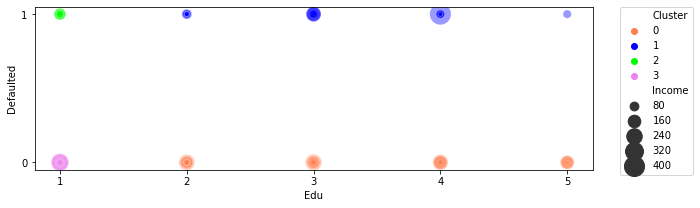

In [34]:
fig, ax = plt.subplots(figsize=(10, 3))

sns.scatterplot(
    x=df.Edu,
    y=df.Defaulted,
    size=df.Income,
    sizes=(10, 450),
    hue=df.Cluster,
    alpha=0.4,
    palette=cmap,
    ax=ax,
)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

### 2-D: `Edu` / `Years Employed` / `Defaulted`

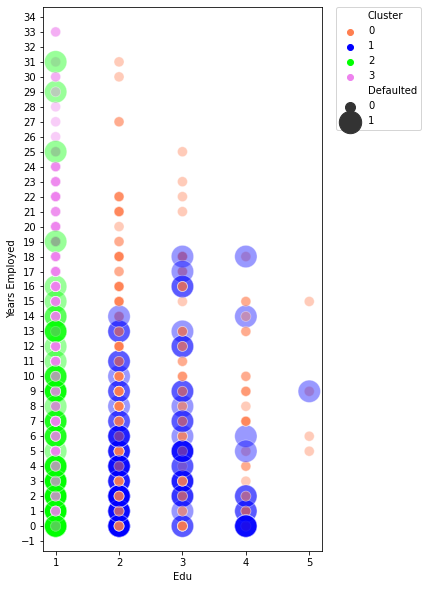

In [35]:
fig, ax = plt.subplots(figsize=(5, 10))

sns.scatterplot(
    x=df.Edu,
    y=df["Years Employed"],  # df.Defaulted,
    size=df.Defaulted,
    sizes=(500, 100),
    hue=df.Cluster,
    alpha=0.4,
    palette=cmap,
    ax=ax,
)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

### 3-D

In [36]:
cluster_examples["Cluster"] = cluster_examples.Cluster.astype(int)

In [37]:
cluster_examples

,Address,Age,Card Debt,Cluster,DebtIncomeRatio,Defaulted,Edu,Income,Other Debt,Years Employed
671,NBA011,53.0,1.875,0,7.9,0.0,4.0,61.0,2.944,7.0
579,NBA003,24.0,0.888,1,9.7,1.0,2.0,26.0,1.634,2.0
632,NBA000,36.0,0.815,2,11.2,1.0,1.0,28.0,2.321,10.0
635,NBA019,47.0,5.821,3,12.6,0.0,1.0,110.0,8.039,16.0


In [40]:
%matplotlib widget
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=-40, elev=-150)


ax.scatter(
    df.Edu, df.Defaulted, df["Years Employed"], c=df.Cluster, alpha=0.4, s=80, cmap=cmap
)

ax.set_xlabel("Education")
ax.set_ylabel("Defaulted")
ax.set_zlabel("Years Employed")

norm = BoundaryNorm(clusters, cmap.N - 1)

for index, row in cluster_examples.iterrows():
    ax.scatter(
        row.Edu,
        row.Defaulted + 0.1,
        row["Years Employed"],
        c=row.Cluster,
        marker=f"${row.Cluster:1.0f}$",
        alpha=1,
        s=500,
        edgecolor="gray",
        norm=norm,
        cmap=cmap,
    )

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [39]:
%matplotlib inline